In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA, SparsePCA

%matplotlib inline

In [75]:
emb_path = "D:/svruchtel/EMBEDDINGS/glove.840B.300d/glove.840B.300d-char.txt"

emb_word_to_vector = {}

with open(emb_path, 'r', encoding='utf-8') as f:
    for line in f:
        line_split = line.strip().split(" ")
        word = line_split[0]
        word_emb = np.array(line_split[1:], dtype=float)
            
        if word_emb.shape != (300,):
            print("ERROR! Shape is", word_emb.shape, word)
            continue
        emb_word_to_vector[word] = word_emb

In [76]:
emb_word_to_vector

{'!': array([ 2.714000e-02, -2.024170e-01,  2.155360e-01, -2.427460e-01,
         5.435500e-02, -2.411930e-01,  3.420300e-02, -9.928900e-02,
         1.041060e-01, -1.345139e+00,  2.466390e-01, -1.535860e-01,
        -2.067630e-01,  4.219060e-01,  4.100190e-01, -1.205890e-01,
         4.383010e-01, -9.441490e-01,  2.447260e-01, -1.850600e-02,
         1.186620e-01, -1.713450e-01,  3.296220e-01, -1.485400e-02,
        -9.166700e-02,  3.682000e-02, -1.057000e-01, -1.728680e-01,
        -1.101610e-01, -4.159100e-02,  1.249970e-01, -4.150800e-02,
         9.405100e-02, -1.984000e-01, -1.097540e-01,  1.081570e-01,
         9.872400e-02, -9.214400e-02,  2.277900e-02,  1.762570e-01,
        -2.184600e-01, -2.131300e-02, -2.096970e-01,  3.363100e-02,
        -4.005000e-03, -5.963100e-02, -8.191300e-02, -1.241880e-01,
        -7.463500e-02,  2.355940e-01,  6.878500e-02,  5.542700e-02,
         1.222350e-01, -8.685200e-02,  1.568340e-01,  1.781180e-01,
        -6.234900e-02, -1.465500e-02,  1.38

In [77]:
keys = list(emb_word_to_vector.keys())
print(keys)

['h', 'O', '1', 'd', 'V', 'D', 'P', '&', '!', '2', '8', '%', ':', 'C', '(', '^', 's', 'T', 'u', 'I', 'M', 'n', '}', 'q', '\\', '`', ')', 'J', '=', '>', 'X', 'Z', 'B', 'S', 'm', 'c', '6', 'e', 'A', 'z', 'f', 'W', '+', '$', '[', ',', 'K', 'y', 't', '|', '5', '3', '7', 'v', '*', '4', '<', 'H', '_', 'i', 'Q', 'l', 'r', 'F', '9', 'L', '~', 'w', 'p', 'k', ']', '/', 'x', 'a', 'U', ';', '?', 'E', '.', 'G', '0', 'b', "'", '@', '-', 'g', 'o', '#', 'N', '{', '"', 'R', 'Y', 'j']


In [78]:
values = list(emb_word_to_vector.values())

In [79]:
emb_word_to_vector['j'][:30]

array([ 0.260341, -0.309177,  0.136317,  0.042468, -0.101907,  0.098809,
        0.073608,  0.039534, -0.072773, -1.327919,  0.384067, -0.124344,
       -0.087942,  0.204521,  0.237905,  0.049181,  0.217849, -1.238337,
        0.326448,  0.123845,  0.076109,  0.047057,  0.165369,  0.012366,
       -0.101032, -0.030489,  0.142099, -0.033326, -0.12086 , -0.009283])

In [80]:
values[len(values) - 1][:30]

array([ 0.260341, -0.309177,  0.136317,  0.042468, -0.101907,  0.098809,
        0.073608,  0.039534, -0.072773, -1.327919,  0.384067, -0.124344,
       -0.087942,  0.204521,  0.237905,  0.049181,  0.217849, -1.238337,
        0.326448,  0.123845,  0.076109,  0.047057,  0.165369,  0.012366,
       -0.101032, -0.030489,  0.142099, -0.033326, -0.12086 , -0.009283])

In [81]:
pca = PCA(n_components=2)
X = pca.fit_transform(values)

In [82]:
print(np.array(values).shape)
print(X.shape)

(94, 300)
(94, 2)


In [83]:
numbers = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
chars_small = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
              'u', 'v', 'w', 'x', 'y', 'z']
chars_big = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z']

if '5' in numbers:
    print("Hello")


Hello


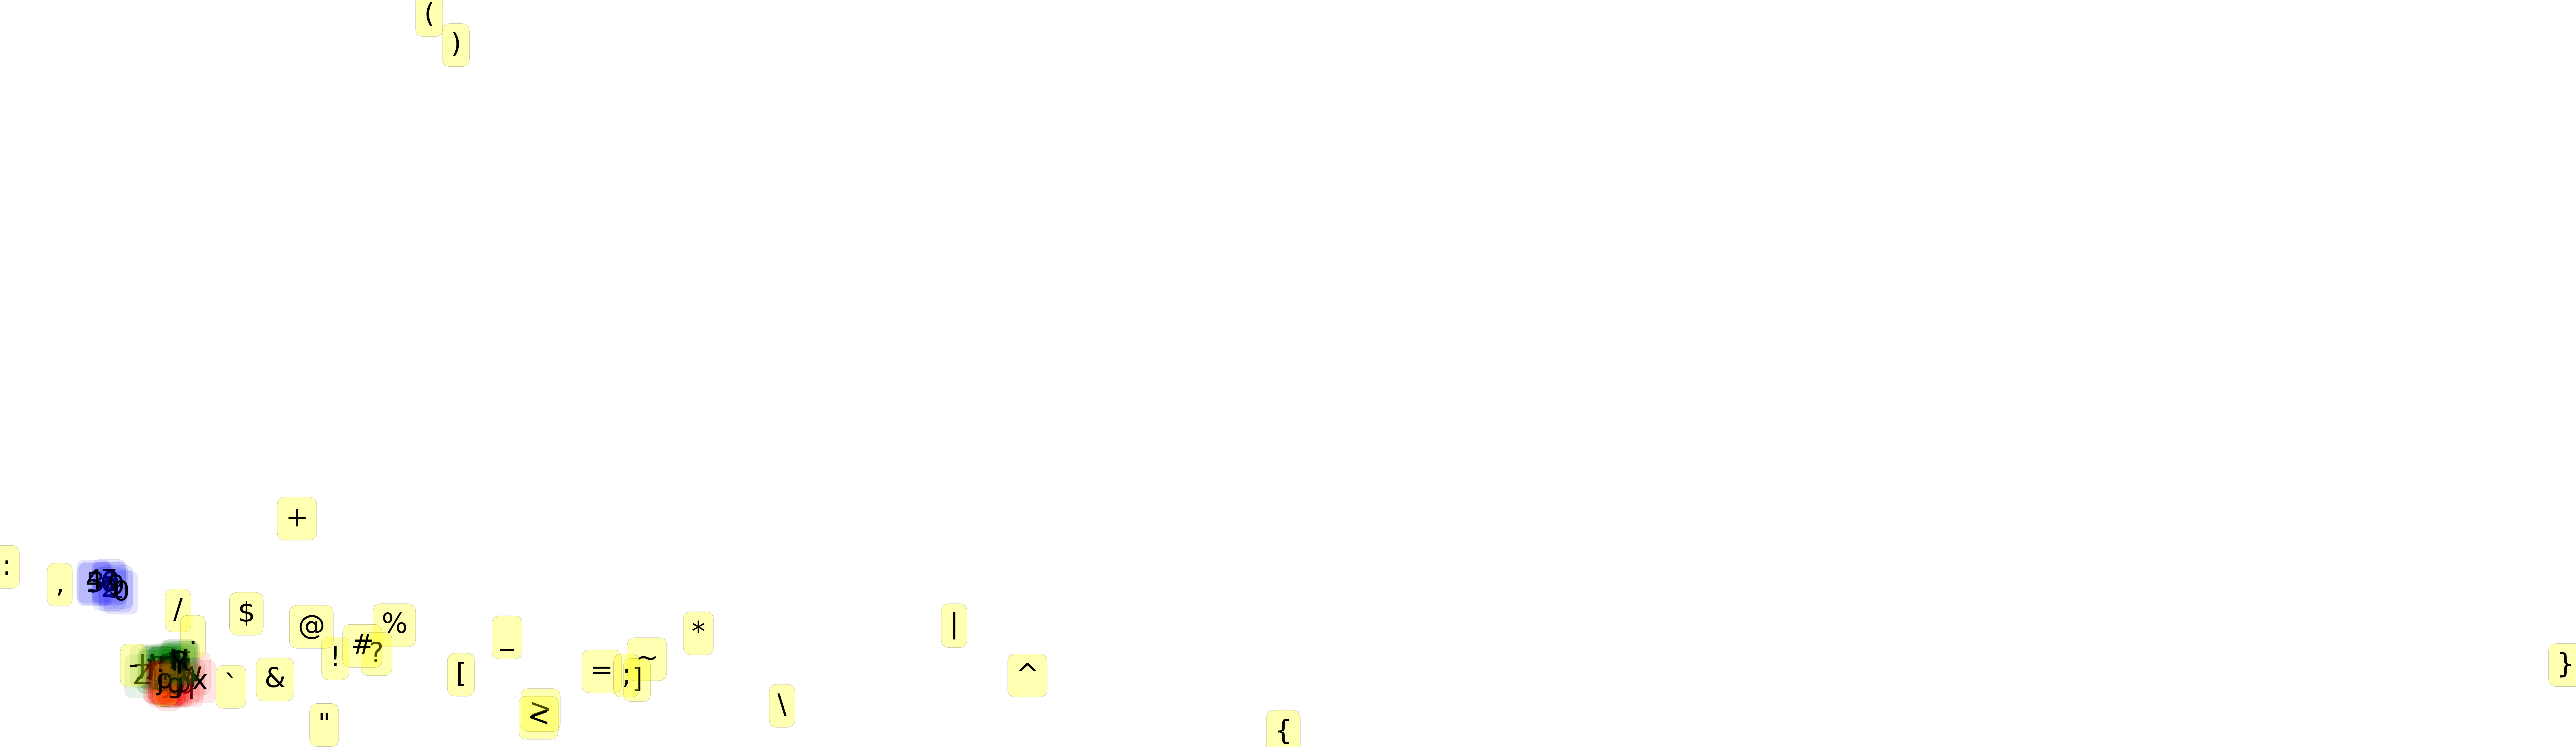

In [84]:
plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))
    else:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.3))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

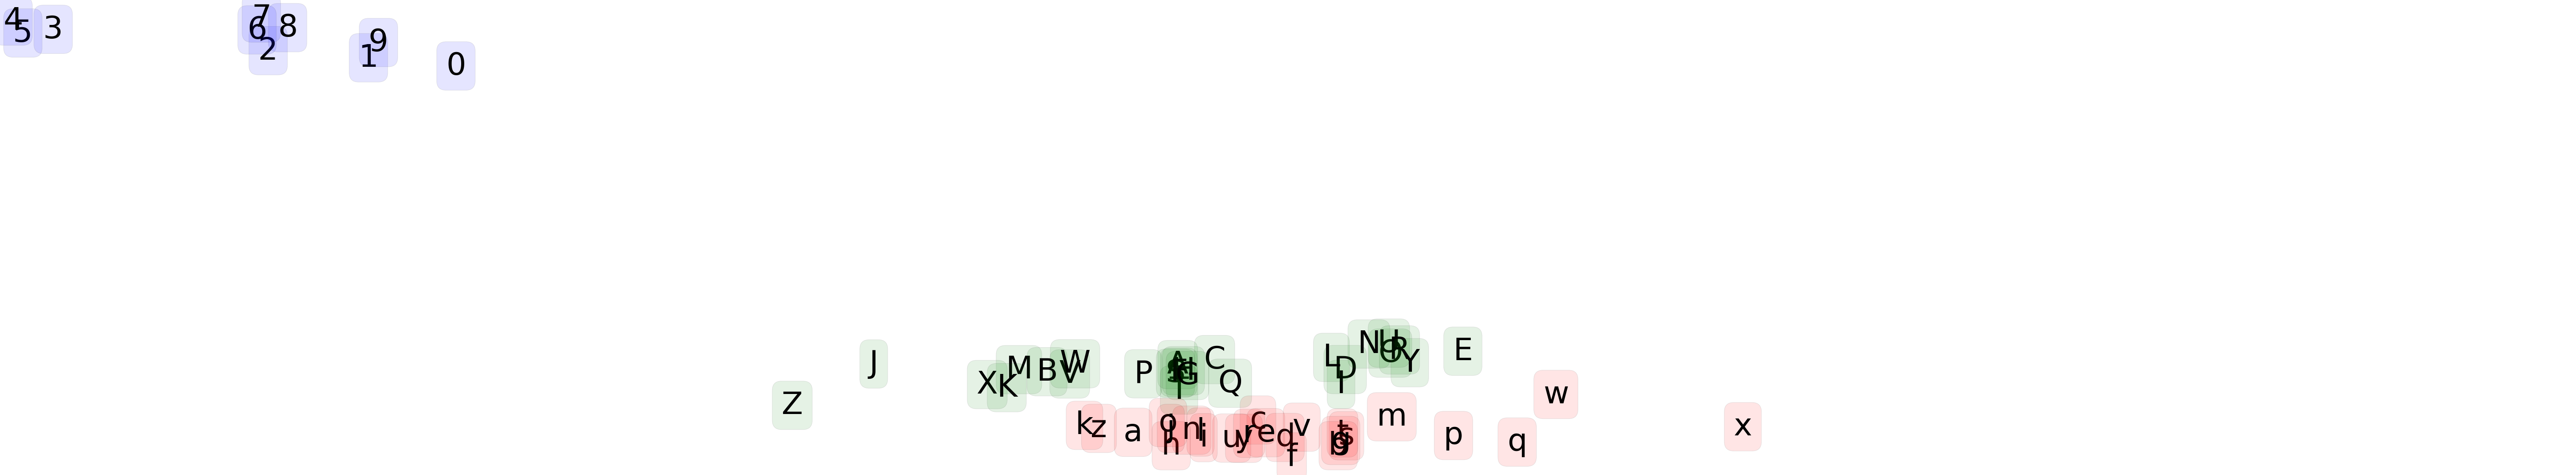

In [87]:
pca = PCA(n_components=2)
X = pca.fit_transform(values)

plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.xlim(-0.2, -0.1)
plt.ylim(-0.2, 0.2)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

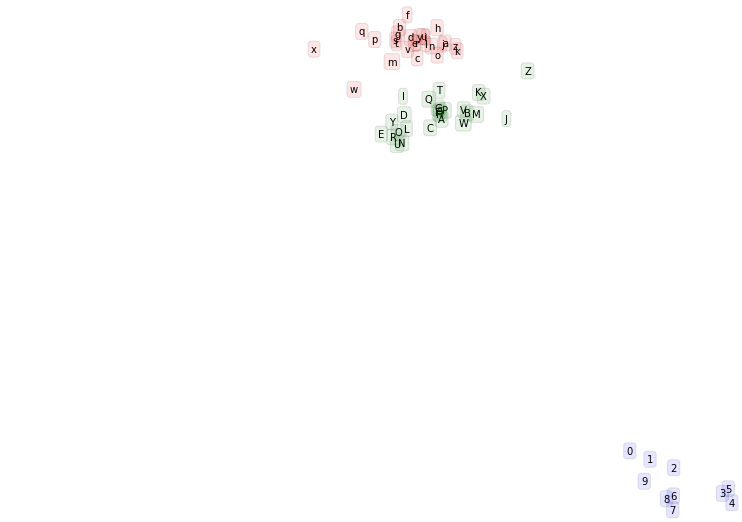

In [143]:
pca = KernelPCA(n_components=2, kernel='poly')
# pca = KernelPCA(n_components=2, kernel='poly', degree=5)
X = pca.fit_transform(values)

#plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=10, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=10, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=10, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.xlim(0, 0.03)
plt.ylim(0, 0.03)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

In [162]:
pca = SparsePCA(n_components=2)
# pca = KernelPCA(n_components=2, kernel='poly', degree=5)
X = pca.fit_transform(values)

#plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=250, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=250, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=250, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.xlim(0, 0.0015)
plt.ylim(0, 0.0015)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

In [180]:
pca = SparsePCA(n_components=2)
# pca = KernelPCA(n_components=2, kernel='poly', degree=5)
X = pca.fit_transform(values)

#plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=350, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=350, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=350, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))
    else:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=350, bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.3))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.xlim(0, 0.0028)
plt.ylim(0, 0.0028)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

ERROR! Shape is (299,) 0.37558


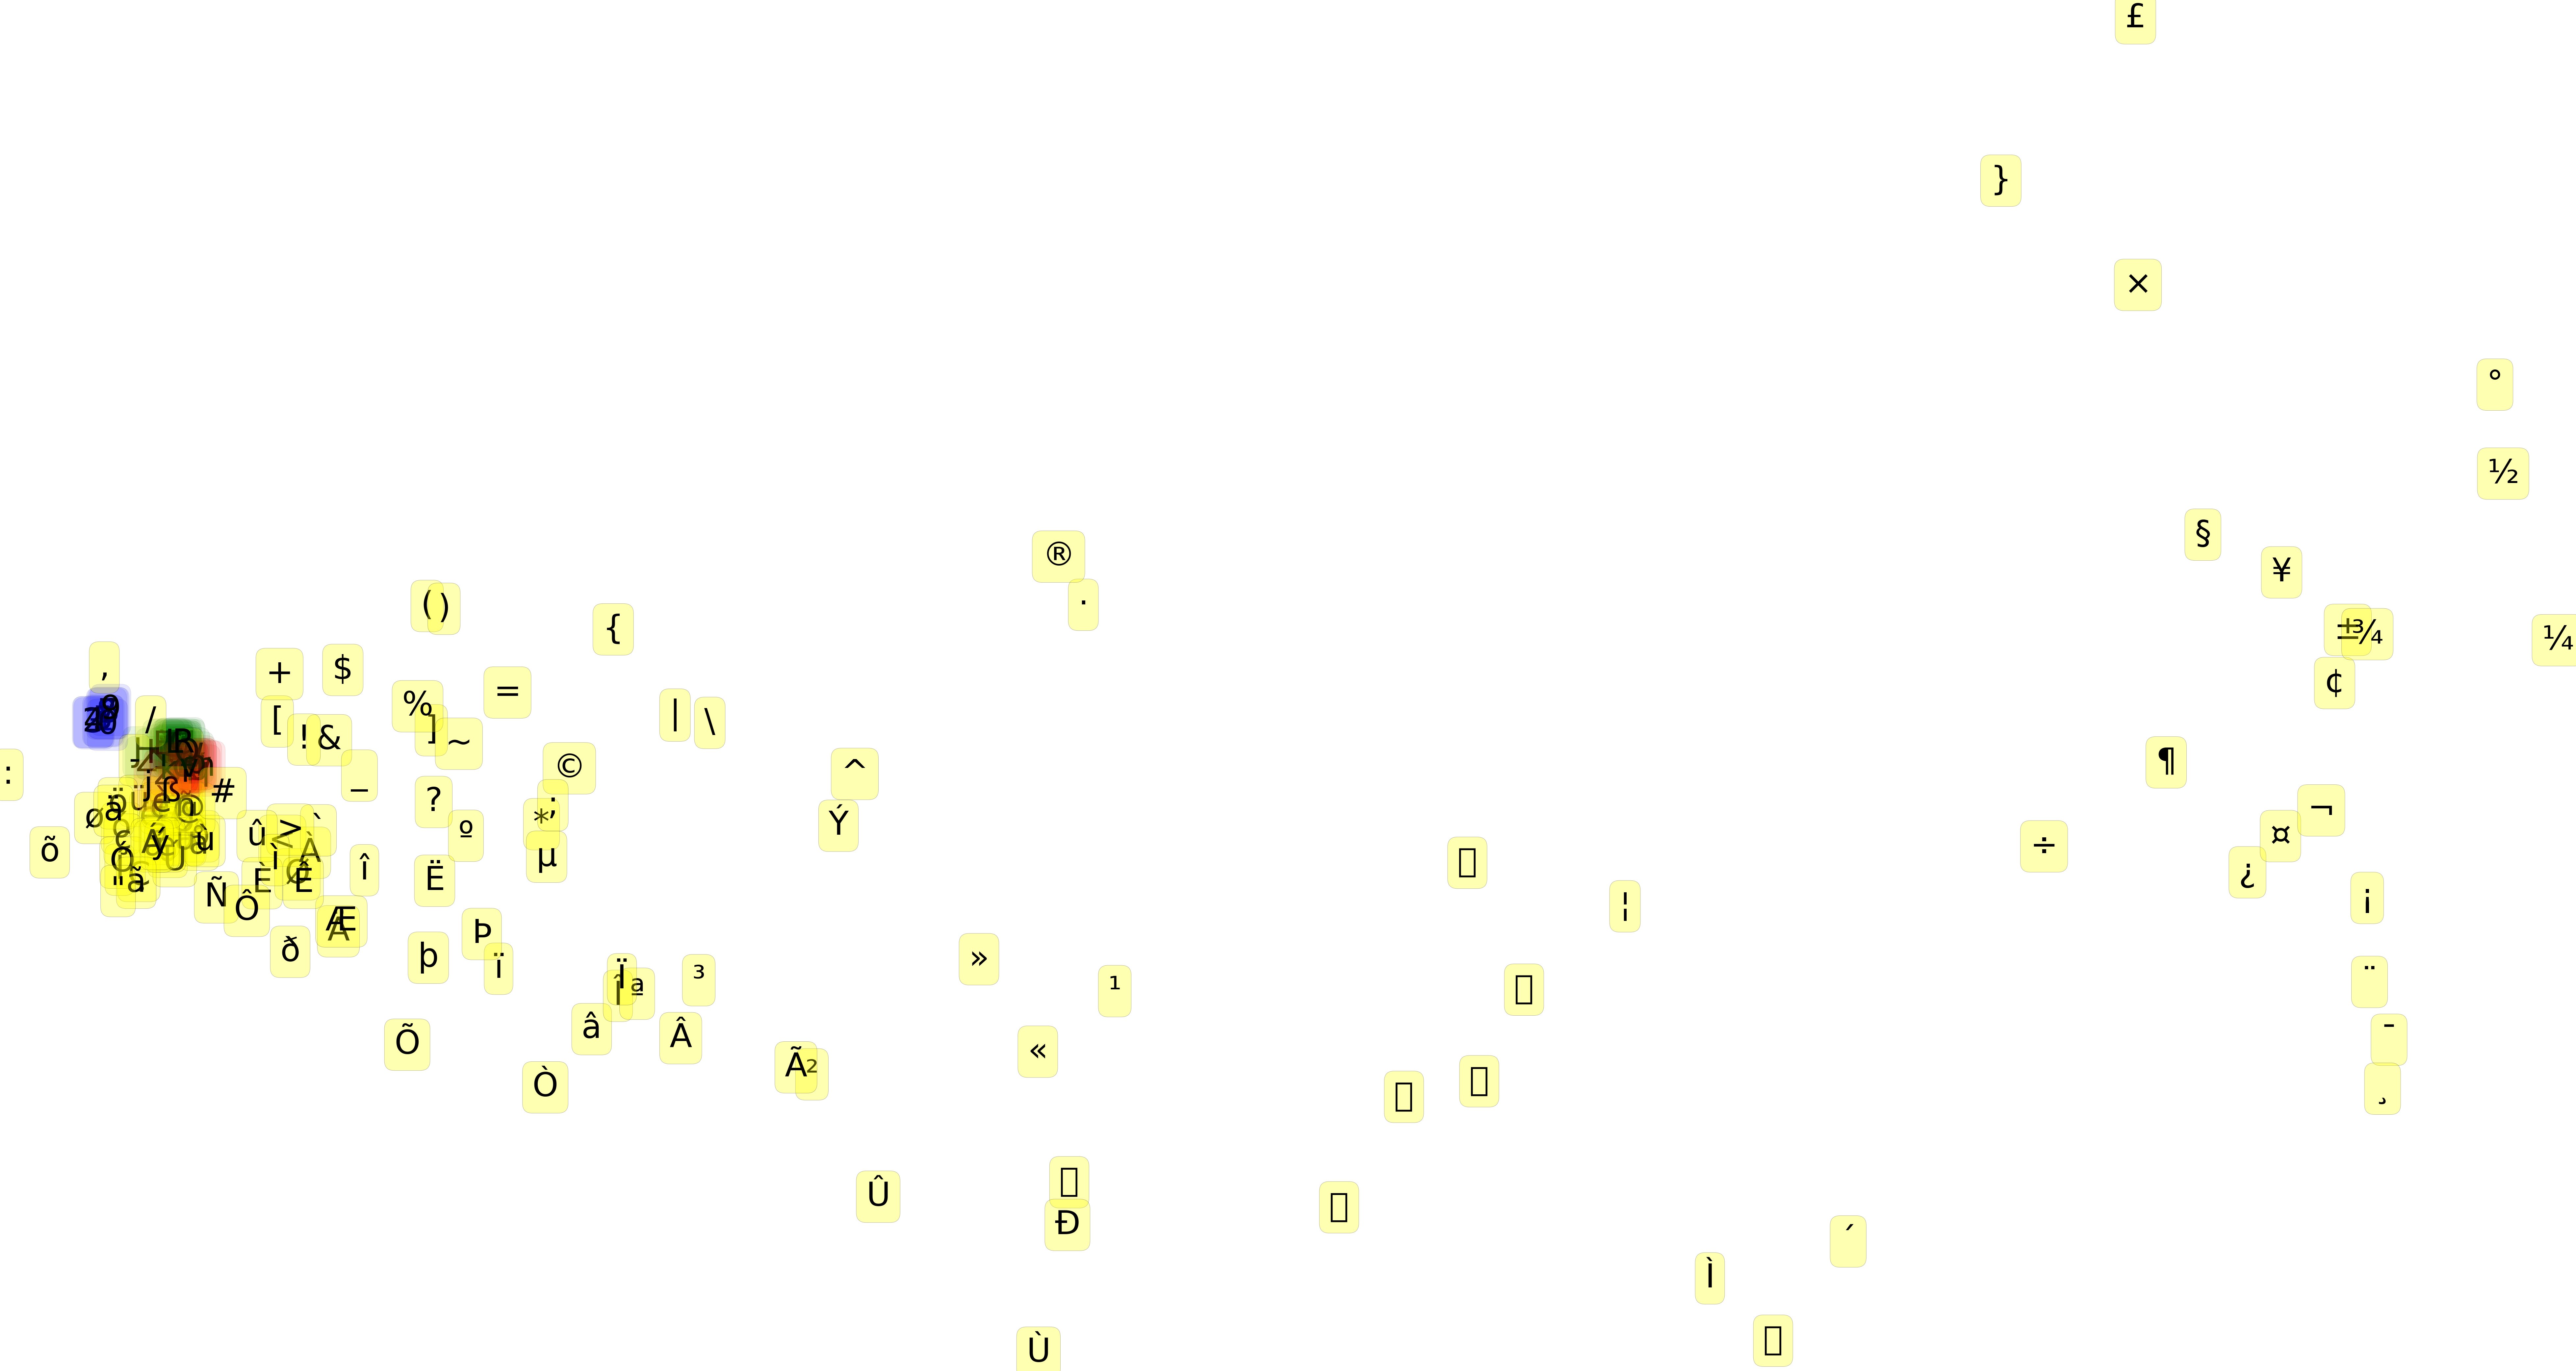

In [70]:
emb_path = "D:/svruchtel/EMBEDDINGS/glove.840B.300d/glove.840B.300d-char-fr.txt"

emb_word_to_vector = {}

with open(emb_path, 'r', encoding='utf-8') as f:
    for line in f:
        line_split = line.strip().split(" ")
        word = line_split[0]
        word_emb = np.array(line_split[1:], dtype=float)
            
        if word_emb.shape != (300,):
            print("ERROR! Shape is", word_emb.shape, word)
            continue
        emb_word_to_vector[word] = word_emb

keys = list(emb_word_to_vector.keys())
values = list(emb_word_to_vector.values())

pca = PCA(n_components=2)
X = pca.fit_transform(values)

plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))
    else:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.3))

plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

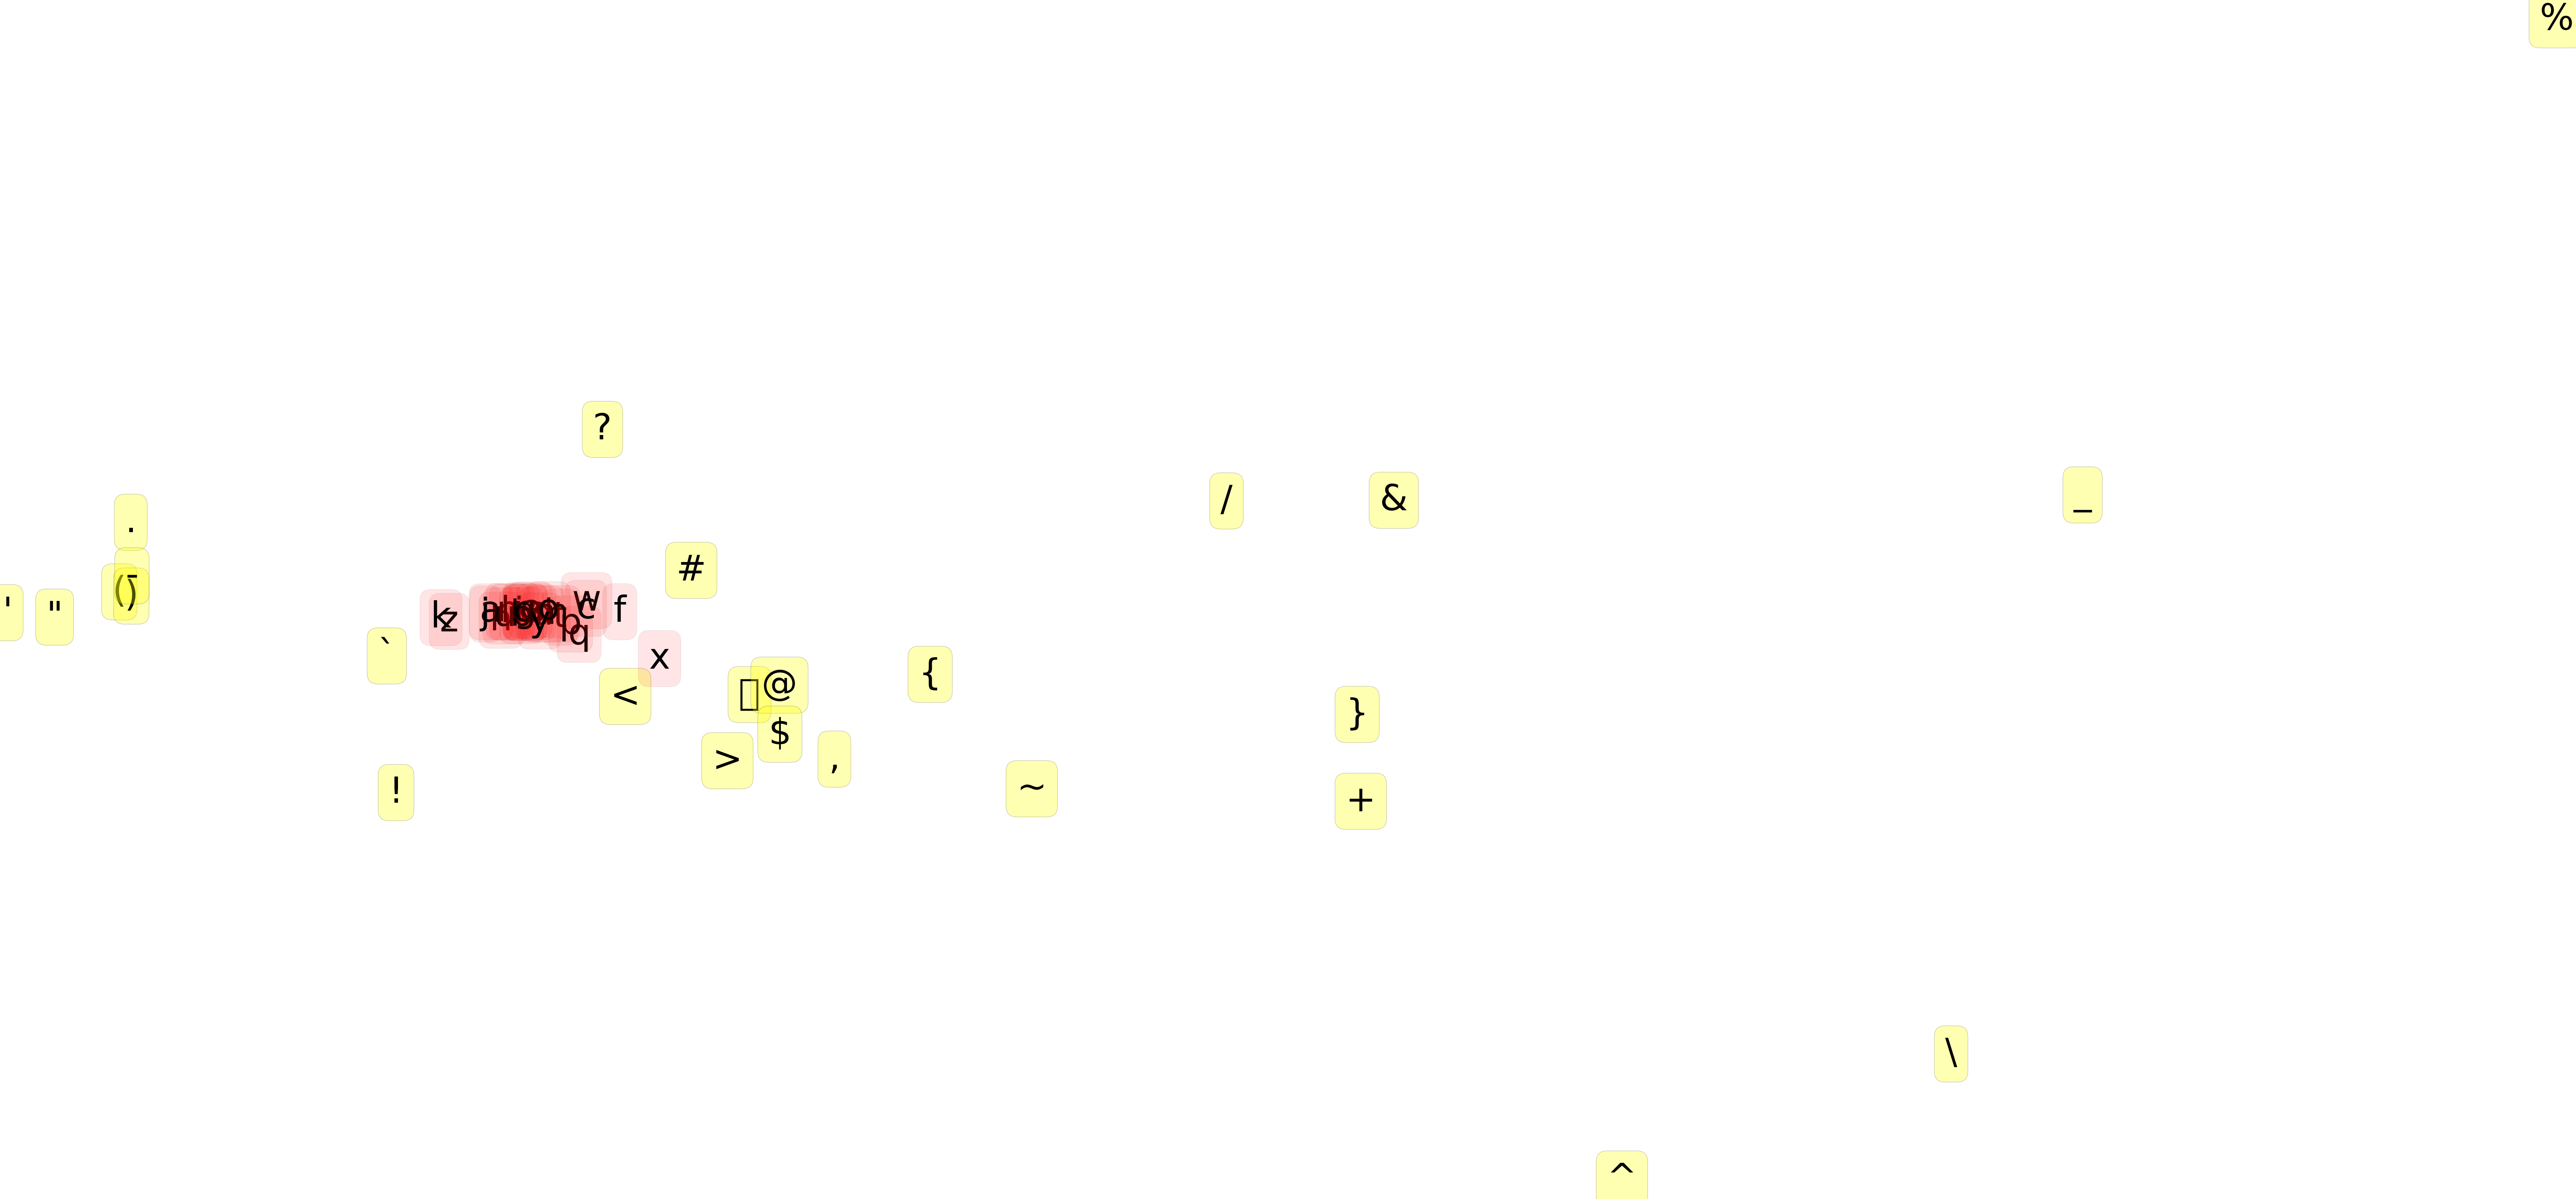

In [73]:
emb_path = "D:/svruchtel/EMBEDDINGS/wiki.en.-char.vec"

emb_word_to_vector = {}

with open(emb_path, 'r', encoding='utf-8') as f:
    for line in f:
        line_split = line.strip().split(" ")
        word = line_split[0]
        word_emb = np.array(line_split[1:], dtype=float)
            
        if word_emb.shape != (300,):
            print("ERROR! Shape is", word_emb.shape, word)
            continue
        emb_word_to_vector[word] = word_emb

keys = list(emb_word_to_vector.keys())
values = list(emb_word_to_vector.values())

pca = PCA(n_components=2)
X = pca.fit_transform(values)

plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))
    else:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=100, bbox=dict(boxstyle="round", facecolor='yellow', alpha=0.3))

plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()

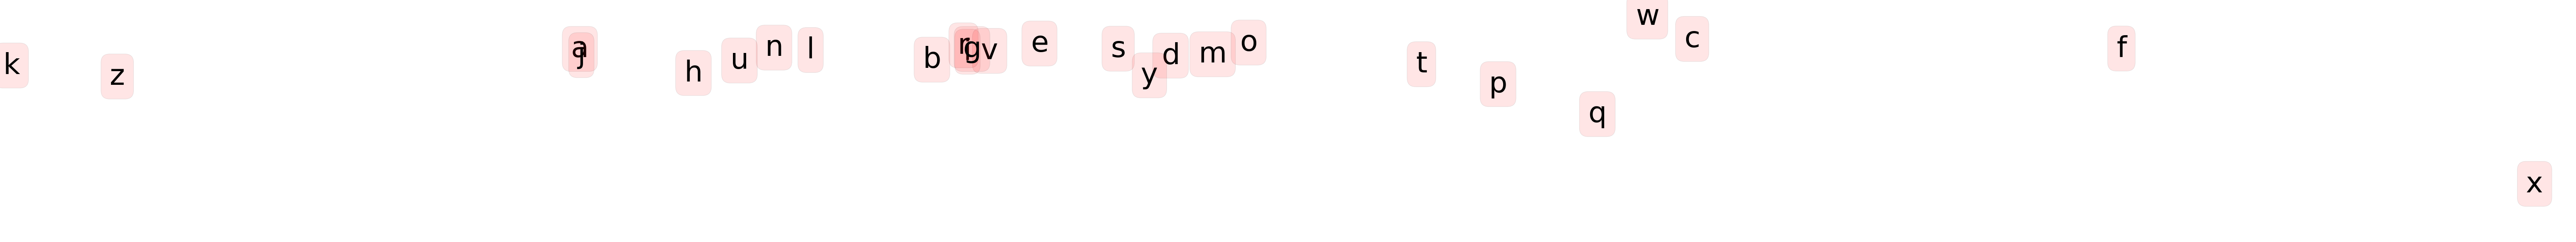

In [74]:
plt.figure(figsize=(20, 10))
for i in range(X.shape[0]):
    if keys[i] in numbers:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='blue', alpha=0.1))
    elif keys[i] in chars_small:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='red', alpha=0.1))
    elif keys[i] in chars_big:
        plt.text(X[i][0], X[i][1], keys[i], fontsize=70, bbox=dict(boxstyle="round", facecolor='green', alpha=0.1))

# plt.text(X[1][0], X[1][1], keys[1], fontsize=20)
plt.xlim(-0.2, -0.1)
plt.ylim(-0.2, 0.2)
plt.setp(plt.gca(), frame_on=False, xticks=(), yticks=())
plt.draw()
plt.show()